<a href="https://colab.research.google.com/github/mghildi/Computer_Vision_Classification/blob/main/Computer_vision_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import glob
import random
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
!gdown 11BsPWFIbA8Rc7oikj8ZTHqW0y-oLapVx


Downloading...
From (original): https://drive.google.com/uc?id=11BsPWFIbA8Rc7oikj8ZTHqW0y-oLapVx
From (redirected): https://drive.google.com/uc?id=11BsPWFIbA8Rc7oikj8ZTHqW0y-oLapVx&confirm=t&uuid=224b3248-839d-4470-9184-d36631163c98
To: /content/ninjacart_data.zip
100% 275M/275M [00:04<00:00, 63.3MB/s]


In [3]:
!unzip /content/ninjacart_data.zip

Archive:  /content/ninjacart_data.zip
   creating: ninjacart_data/test/
   creating: ninjacart_data/test/indian market/
  inflating: ninjacart_data/test/indian market/bhl.jpeg  
  inflating: ninjacart_data/test/indian market/bhv.jpeg  
  inflating: ninjacart_data/test/indian market/bn.jpeg  
  inflating: ninjacart_data/test/indian market/hjx.jpeg  
  inflating: ninjacart_data/test/indian market/igis.jpeg  
  inflating: ninjacart_data/test/indian market/in.jpeg  
  inflating: ninjacart_data/test/indian market/india-4898453__340.jpg  
  inflating: ninjacart_data/test/indian market/indianmarket10.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket12.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket13.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket14.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket15.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket18.jpeg  
  inflating: ninjacart_data/test/indian market/

<ipython-input-4-e94e587d2076>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,n)


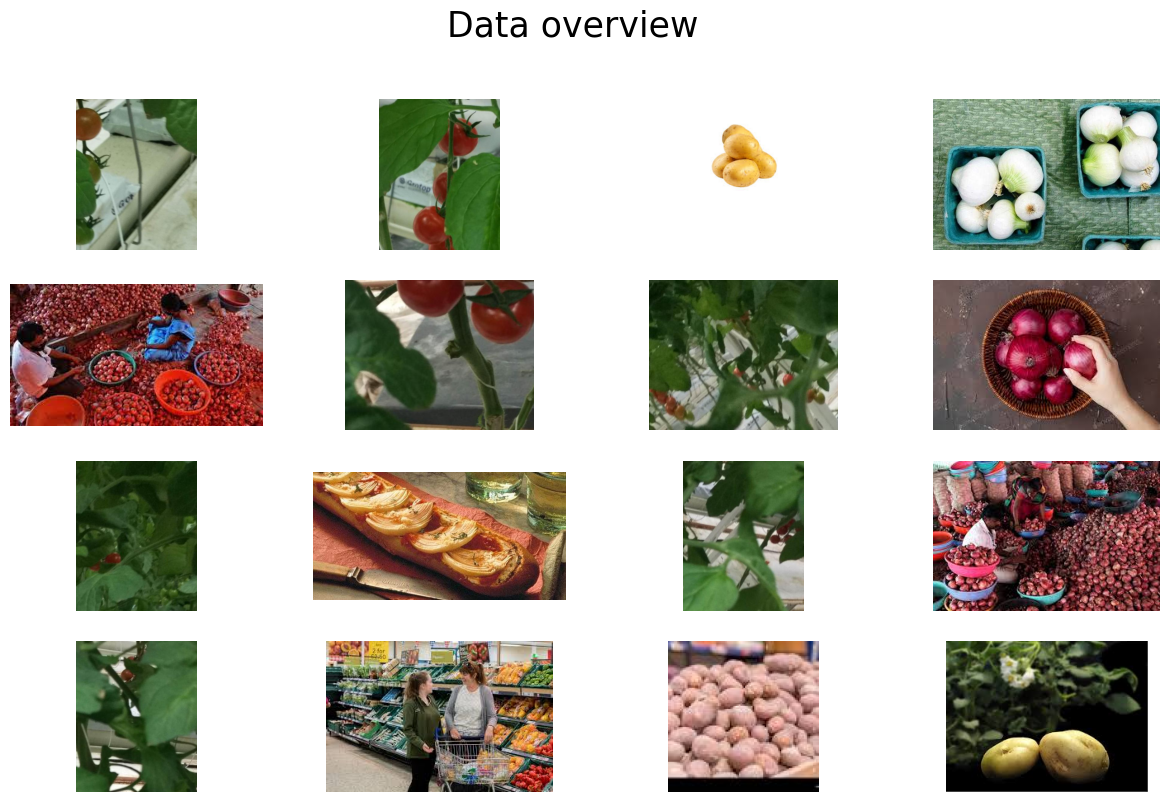

In [4]:
train_folder ='/content/ninjacart_data/train'
images = []
for folder in os.listdir(train_folder):
  for image in os.listdir(train_folder + '/' +folder):
    images.append(os.path.join(train_folder,folder,image))
fig = plt.figure(1, figsize = (15,9))
fig.suptitle('Data overview', fontsize=25)
plt.axis('off')
n=0
for i in range(16):
  n+=1
  random_img = random.choice(images)
  imgs = tf.keras.utils.load_img(random_img)
  plt.subplot(4,4,n)
  plt.axis('off')
  plt.imshow(imgs)
plt.show()

In [5]:
#Size of image is different. Need to have fixed input size
class_dirs = os.listdir('/content/ninjacart_data/train') #list all the directories inside the "train" folder

image_dict = {} #dict to store image array(key) for every class(value)
count_dict = {} #dict to store count of files(key) for every class(value)
#iterate over all class fictories
for cls in class_dirs:
  #get list of all path inside the subdirectories
  file_paths = glob.glob(f'/content/ninjacart_data/train/{cls}/*')
  #count number of file in each class and add to count_dict
  count_dict[cls] = len(file_paths)
  #select random item from list of image path
  image_path = random.choice(file_paths)
  #load image using keras utility function and save it in a image _dict
  image_dict[cls] = tf.keras.utils.load_img(image_path)


In [6]:
class_dirs_test = os.listdir('/content/ninjacart_data/test') #list all directories inside test folder
image_dict_test = {} #dict to store image array(key) for every class(value)
count_dict_test = {} #dict to store count of files(key) for every class(value)
#iterate over all class fictories
for cls in class_dirs_test:
  #get list of all path inside the subdirectories
  file_paths_test = glob.glob(f'/content/ninjacart_data/test/{cls}/*')
  #count number of file in each class and add to count_dict
  count_dict_test[cls] = len(file_paths_test)
  #select random item from list of image path
  image_path = random.choice(file_paths_test)
  #load image using keras utility function and save it in a image _dict
  image_dict[cls] = tf.keras.utils.load_img(image_path)

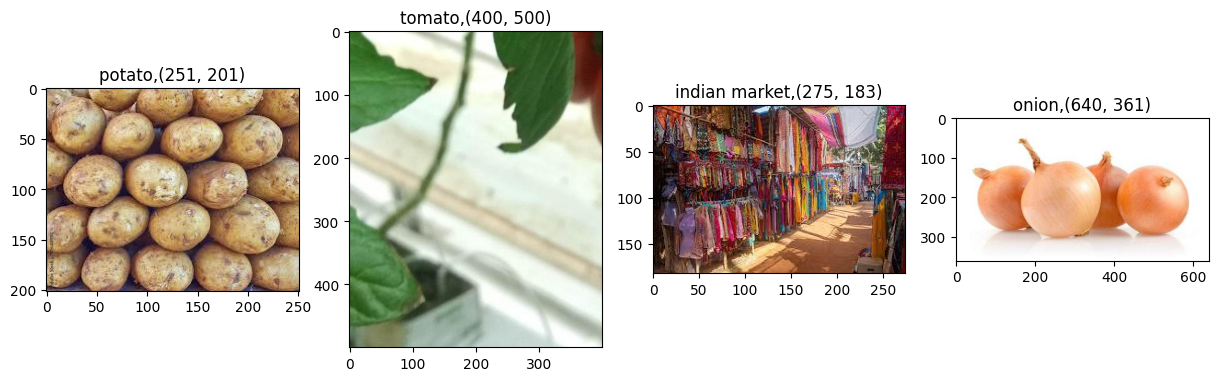

In [7]:
#visualize random sample from each class
plt.figure(figsize=(15,7))
#iterate over dictonory items class label , image array
for i,(cls,img) in enumerate(image_dict.items()):
  #create a subplot axis
  ax = plt.subplot(1,4,i+1)
  #plot each image
  plt.imshow(img)
  plt.title(f'{cls},{img.size}')

Count of training sample per class:
            class  count
0         potato    898
1         tomato    789
2  indian market    599
3          onion    849 



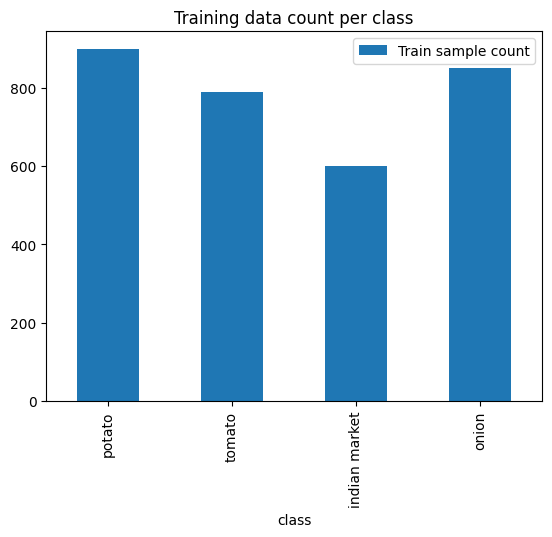

In [8]:
#lets now plot the data distribution of training data across classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),
    "count": count_dict.values(),
})
print("Count of training sample per class:\n", df_count_train,"\n")
#draw a bar plot
b = df_count_train.plot.bar(x = 'class', y ='count',title = "Training data count per class", label = 'Train sample count')
plt.show()

its an imbalanced data hower imbalance is not too high

In [9]:
train_dir = '/content/ninjacart_data/train'
test_dir = '/content/ninjacart_data/test'
#specifying image size to resize all images
image_size = (256,256)


In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    label_mode='categorical',
    batch_size=32,
    image_size=image_size,
    seed=2,
    validation_split=0.2,
    subset="training",
    shuffle=True
)


Found 3135 files belonging to 4 classes.
Using 2508 files for training.


In [11]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    label_mode='categorical',
    batch_size=32,
    image_size=image_size,
    seed=2

)


Found 351 files belonging to 4 classes.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    label_mode='categorical',
    batch_size=32,
    image_size=image_size,
    seed=2,
    validation_split=0.2,
    subset="validation",

)

Found 3135 files belonging to 4 classes.
Using 627 files for validation.


In [13]:
class_names = ['noise','onion','tomato','potato']

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.InputLayer(input_shape=[image_size[0], image_size[1],3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3), padding = 'Same',activation ='relu'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3), padding = 'Same',activation ='relu'),
    tf.keras.layers.MaxPool2D(pool_size =(2,2)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size =(3,3), padding = 'Same',activation ='relu'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size =(3,3), padding = 'Same',activation ='relu'),
    tf.keras.layers.MaxPool2D(pool_size =(2,2)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size =(3,3), padding = 'Same',activation ='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4,activation = 'softmax')
])

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy','Precision','Recall']
              )

In [16]:
#Model training
log_dir_1 = "logs/Custom_CNN_overfit"
tensorboard_cb =  tf.keras.callbacks.TensorBoard(log_dir = log_dir_1, histogram_freq=1)
history = model.fit(train_ds,epochs =10,validation_data=val_ds, callbacks = [tensorboard_cb])

Epoch 1/10
79/79 [==============================] - 30s 230ms/step - loss: 1.3281 - accuracy: 0.3529 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.1804 - val_accuracy: 0.6236 - val_precision: 0.9000 - val_recall: 0.0144
Epoch 2/10
79/79 [==============================] - 15s 170ms/step - loss: 0.9571 - accuracy: 0.6499 - precision: 0.8576 - recall: 0.2931 - val_loss: 0.7803 - val_accuracy: 0.7129 - val_precision: 0.8311 - val_recall: 0.5024
Epoch 3/10
79/79 [==============================] - 13s 160ms/step - loss: 0.7369 - accuracy: 0.7273 - precision: 0.8257 - recall: 0.5873 - val_loss: 0.7253 - val_accuracy: 0.6970 - val_precision: 0.7626 - val_recall: 0.6045
Epoch 4/10
79/79 [==============================] - 14s 173ms/step - loss: 0.6756 - accuracy: 0.7464 - precision: 0.8183 - recall: 0.6555 - val_loss: 0.6840 - val_accuracy: 0.7161 - val_precision: 0.7736 - val_recall: 0.6268
Epoch 5/10
79/79 [==============================] - 14s 166ms/step - loss: 0.6514 - accuracy

In [17]:
def plot_acc_model(model_history,n_epochs):
  fig,axes = plt.subplots(nrows=1,ncols=2,figsize =(15,5))
  ax = axes.ravel()
  #Accuracy
  ax[0].plot(range(0,n_epochs), [acc*100 for acc in model_history.history['accuracy'] ], label ='Train',color = 'b')
  ax[0].plot(range(0,n_epochs), [acc*100 for acc in model_history.history['val_accuracy'] ], label ='Val',color = 'r')
  ax[0].set_title('Acuuracy vs epochs', fontsize =15)
  ax[0].set_ylabel('Acuuracy', fontsize =15)
  ax[0].set_xlabel('epochs', fontsize =15)
  ax[0].legend()
  #Loss
  ax[1].plot(range(0,n_epochs), model_history.history['loss'] , label ='Train',color = 'b')
  ax[1].plot(range(0,n_epochs), model_history.history['val_loss'] , label ='Val',color = 'r')
  ax[1].set_title('Loss vs epochs', fontsize =15)
  ax[1].set_ylabel('Loss', fontsize =15)
  ax[1].set_xlabel('epochs', fontsize =15)
  ax[1].legend()
  plt.show()




In [18]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(height_factor=0.2,width_factor=0.2)
])
aug_ds = train_ds
for image,label in aug_ds:
  image = augmentation(image)

In [19]:
model_revamp =tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.InputLayer(input_shape=[image_size[0], image_size[1],3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3), padding = 'Same',activation ='relu'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3), padding = 'Same',activation ='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size =(2,2)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size =(3,3), padding = 'Same',activation ='relu'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size =(3,3), padding = 'Same',activation ='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size =(2,2)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size =(3,3), padding = 'Same',activation ='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [20]:
model_revamp.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy','Precision','Recall'])

In [21]:
#Model training
log_dir_2 = "logs/Custom_CNN_overfit"
tensorboard_cb =  tf.keras.callbacks.TensorBoard(log_dir = log_dir_2, histogram_freq=1)
checkpoint_cb =tf.keras.callbacks.ModelCheckpoint("CNN_best.h5", save_best_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',patience=10,restore_best_weights=True

)


In [22]:
history_0 = model_revamp.fit(
    train_ds,epochs=10,validation_data =val_ds,
    callbacks = [tensorboard_cb, checkpoint_cb,early_stopping_cb]
)

Epoch 1/10
79/79 [==============================] - 20s 197ms/step - loss: 0.7074 - accuracy: 0.7325 - precision: 0.8214 - recall: 0.6144 - val_loss: 1.4268 - val_accuracy: 0.2360 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
79/79 [==============================] - 16s 189ms/step - loss: 0.5321 - accuracy: 0.8050 - precision: 0.8503 - recall: 0.7313 - val_loss: 1.5318 - val_accuracy: 0.2360 - val_precision: 0.3183 - val_recall: 0.2360
Epoch 3/10
79/79 [==============================] - 16s 184ms/step - loss: 0.4834 - accuracy: 0.8206 - precision: 0.8601 - recall: 0.7695 - val_loss: 1.6152 - val_accuracy: 0.2360 - val_precision: 0.2360 - val_recall: 0.2360
Epoch 4/10
79/79 [==============================] - 15s 184ms/step - loss: 0.4264 - accuracy: 0.8457 - precision: 0.8856 - recall: 0.8022 - val_loss: 1.8154 - val_accuracy: 0.2360 - val_precision: 0.2360 - val_recall: 0.2360
Epoch 5/10
79/79 [==============================] - 16s 181ms/step - loss: 0.4164 - accuracy: 0.8461 - precision: 0.8758 - recall: 0.8010 - val_loss: 1.5270 - val_accuracy: 0.2552 - val_precision: 0.2808 - val_recall: 0.2360
Epoch 6/10
79/79 [==============================] - 15s 183ms/step - loss: 0.3950 - accuracy: 0.8493

In [24]:
result = model_revamp.evaluate(test_ds)
dict(zip(model_revamp.metrics_names,result))

11/11 [==============================] - 4s 276ms/step - loss: 0.3727 - accuracy: 0.8746 - precision: 0.9037 - recall: 0.8291


{'loss': 0.37269774079322815,
 'accuracy': 0.874643862247467,
 'precision': 0.9037266969680786,
 'recall': 0.8290598392486572}

In [25]:
#Transfer Learning through VGG-19
base_model_3 = tf.keras.applications.vgg19.VGG19(input_shape=(256,256,3), include_top = False)

80134624/80134624 [==============================] - 1s 0us/step


In [27]:
#append classification layer
model_3 = base_model_3.output
model_3 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.InputLayer(input_shape=[image_size[0], image_size[1],3]),
    base_model_3,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation = 'softmax')])

In [29]:
model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy','Precision','Recall'])

In [31]:
#Model training
log_dir_5 = "logs/VGG19"
tensorboard_cb =  tf.keras.callbacks.TensorBoard(log_dir = log_dir_5, histogram_freq=1)
checkpoint_cb =tf.keras.callbacks.ModelCheckpoint("VGG19", save_best_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',patience=10,restore_best_weights=True
)

In [32]:
history_3 = model_3.fit(
    aug_ds,epochs=20,validation_data =val_ds,
    callbacks = [tensorboard_cb, checkpoint_cb,early_stopping_cb]
)

Epoch 1/20
79/79 [==============================] - 113s 1s/step - loss: 0.6613 - accuracy: 0.7213 - precision: 0.7983 - recall: 0.6471 - val_loss: 0.4150 - val_accuracy: 0.8405 - val_precision: 0.8918 - val_recall: 0.8022
Epoch 2/20
79/79 [==============================] - 64s 808ms/step - loss: 0.2897 - accuracy: 0.8959 - precision: 0.9071 - recall: 0.8796 - val_loss: 0.3626 - val_accuracy: 0.8644 - val_precision: 0.8710 - val_recall: 0.8612
Epoch 3/20
79/79 [==============================] - 63s 792ms/step - loss: 0.2883 - accuracy: 0.8923 - precision: 0.9051 - recall: 0.8780 - val_loss: 0.2764 - val_accuracy: 0.8820 - val_precision: 0.8922 - val_recall: 0.8708
Epoch 4/20
79/79 [==============================] - 64s 798ms/step - loss: 0.1878 - accuracy: 0.9342 - precision: 0.9392 - recall: 0.9246 - val_loss: 0.1097 - val_accuracy: 0.9553 - val_precision: 0.9567 - val_recall: 0.9506
Epoch 5/20
79/79 [==============================] - 61s 752ms/step - loss: 0.1224 - accuracy: 0.9569 -

In [33]:
#Transfer Learning through Resnet
base_model_1 = tf.keras.applications.resnet50.ResNet50(input_shape=(256,256,3), include_top = False)

94765736/94765736 [==============================] - 1s 0us/step


In [35]:
#append classification layer
model_1 = base_model_1.output
model_1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.InputLayer(input_shape=[image_size[0], image_size[1],3]),
    base_model_1,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation = 'softmax')])

In [37]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy','Precision','Recall'])

In [39]:
#Model training
log_dir_3 = "logs/ResNet"
tensorboard_cb =  tf.keras.callbacks.TensorBoard(log_dir = log_dir_3, histogram_freq=1)
checkpoint_cb =tf.keras.callbacks.ModelCheckpoint("ResNet.h5", save_best_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',patience=10, restore_best_weights=True)

In [40]:
history_1 = model_1.fit(
    aug_ds,epochs=20,validation_data =val_ds,
    callbacks = [tensorboard_cb, checkpoint_cb,early_stopping_cb]
)

Epoch 1/20
79/79 [==============================] - ETA: 0s - loss: 0.1675 - accuracy: 0.9446 - precision: 0.9597 - recall: 0.9314

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - 89s 640ms/step - loss: 0.1675 - accuracy: 0.9446 - precision: 0.9597 - recall: 0.9314 - val_loss: 2.3611 - val_accuracy: 0.1818 - val_precision: 0.1818 - val_recall: 0.1818
Epoch 2/20
79/79 [==============================] - 44s 549ms/step - loss: 0.0293 - accuracy: 0.9936 - precision: 0.9940 - recall: 0.9932 - val_loss: 2.1162 - val_accuracy: 0.2823 - val_precision: 0.4821 - val_recall: 0.1722
Epoch 3/20
79/79 [==============================] - 41s 513ms/step - loss: 0.0259 - accuracy: 0.9928 - precision: 0.9932 - recall: 0.9928 - val_loss: 2.4316 - val_accuracy: 0.2504 - val_precision: 0.2110 - val_recall: 0.1037
Epoch 4/20
79/79 [==============================] - 42s 521ms/step - loss: 0.0069 - accuracy: 0.9980 - precision: 0.9980 - recall: 0.9980 - val_loss: 2.0611 - val_accuracy: 0.3317 - val_precision: 0.3505 - val_recall: 0.1850
Epoch 5/20
79/79 [==============================] - 42s 517ms/step - loss: 0.0173 - accuracy: 0.9956 - precisio

In [41]:
#Transfer Learning through MobileNet
base_model_2 = tf.keras.applications.mobilenet.MobileNet(input_shape=(256,256,3), include_top = False)

17225924/17225924 [==============================] - 0s 0us/step


In [42]:
#append classification layer
model_2 = base_model_2.output
model_2 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.InputLayer(input_shape=[image_size[0], image_size[1],3]),
    base_model_2,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(4, activation = 'softmax')])

In [43]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy','Precision','Recall'])

In [44]:
#Model training
log_dir_4 = "logs/MobileNet"
tensorboard_cb =  tf.keras.callbacks.TensorBoard(log_dir = log_dir_4, histogram_freq=1)
checkpoint_cb =tf.keras.callbacks.ModelCheckpoint("MobileNet.h5", save_best_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',patience=10,restore_best_weights=True)

In [45]:
history_2 = model_2.fit(
    aug_ds,epochs=20,validation_data =val_ds,
    callbacks = [tensorboard_cb, checkpoint_cb,early_stopping_cb]
)

Epoch 1/20
79/79 [==============================] - ETA: 0s - loss: 0.2946 - accuracy: 0.8947 - precision: 0.9141 - recall: 0.8828

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - 32s 221ms/step - loss: 0.2946 - accuracy: 0.8947 - precision: 0.9141 - recall: 0.8828 - val_loss: 0.0952 - val_accuracy: 0.9697 - val_precision: 0.9727 - val_recall: 0.9665
Epoch 2/20
79/79 [==============================] - 16s 198ms/step - loss: 0.0357 - accuracy: 0.9920 - precision: 0.9928 - recall: 0.9912 - val_loss: 0.0601 - val_accuracy: 0.9777 - val_precision: 0.9792 - val_recall: 0.9761
Epoch 3/20
79/79 [==============================] - 16s 190ms/step - loss: 0.0138 - accuracy: 0.9984 - precision: 0.9988 - recall: 0.9984 - val_loss: 0.0571 - val_accuracy: 0.9745 - val_precision: 0.9745 - val_recall: 0.9745
Epoch 4/20
79/79 [==============================] - 16s 193ms/step - loss: 0.0087 - accuracy: 0.9996 - precision: 0.9996 - recall: 0.9996 - val_loss: 0.0447 - val_accuracy: 0.9872 - val_precision: 0.9872 - val_recall: 0.9856
Epoch 5/20
79/79 [==============================] - 16s 192ms/step - loss: 0.0075 - accuracy: 0.9988 - precisio

0.9568 - val_recall: 0.9537
ChatGPT
Here's a summary of the model performances using different architectures:

Own CNN Layer with Data Augmentation:

Epochs: 10
Loss: 0.3482
Accuracy: 0.8796
Precision: 0.9095
Recall: 0.8573
Validation Loss: 0.3599
Validation Accuracy: 0.8868
Validation Precision: 0.9080
Validation Recall: 0.8501
Transfer Learning with VGG-19:

Epochs: 14/20
Loss: 0.0500
Accuracy: 0.9817
Precision: 0.9820
Recall: 0.9809
Validation Loss: 0.4418
Validation Accuracy: 0.8963
Validation Precision: 0.9058
Validation Recall: 0.8900
Transfer Learning with ResNet:

Epochs: 20
Loss: 0.0189
Accuracy: 0.9956
Precision: 0.9960
Recall: 0.9952
Validation Loss: 0.0888
Validation Accuracy: 0.9793
Validation Precision: 0.9793
Validation Recall: 0.9793
Transfer Learning with MobileNet:

Epochs: Not specified
Loss: 0.0101
Accuracy: 0.9968
Precision: 0.9972
Recall: 0.9968
Validation Loss: 0.1369
Validation Accuracy: 0.9569
Validation Precision: 0.9568
Validation Recall: 0.9537
These summaries provide an overview of the model performance metrics such as loss, accuracy, precision, and recall on both training and validation sets for each architecture.